In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot aesthetics
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots

import plotly.graph_objects as go
import plotly.io as pio

## Matches Dataset

In [4]:
df1 = pd.read_csv("matches.csv")

In [5]:
df1.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [7]:
df1.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

## Data Cleaning

In [8]:
#---------------------->   Systematic missing/empty value handling <-----------------------#
# Make a working copy
df = df1.copy()

# Normalize empty strings or whitespace-only strings to NaN for object columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].replace(r'^\s*$', np.nan, regex=True)

# Show missing counts before filling
print('Missing values before fill:')
display(df.isnull().sum())

# Trim whitespace from string columns to avoid hidden empty values
for col in df.select_dtypes(include='object').columns:

    df[col] = df[col].astype(str).str.strip().replace({'nan': np.nan})
# - If match 'result' indicates a no result, set 'winner' and 'player_of_match' accordingly
if 'result' in df.columns:
    no_result_idx = df['result'].astype(str).str.lower() == 'no result'
else:
    no_result_idx = pd.Series([False] * len(df))

if 'winner' in df.columns:
    df.loc[no_result_idx, 'winner'] = df.loc[no_result_idx, 'winner'].fillna('No Result')
    df['winner'] = df['winner'].fillna('Unknown')

if 'player_of_match' in df.columns:
    df.loc[no_result_idx, 'player_of_match'] = df.loc[no_result_idx, 'player_of_match'].fillna('Not Awarded')
    df['player_of_match'] = df['player_of_match'].fillna('Not Awarded')

# Generic fills for common columns
if 'city' in df.columns:
    df['city'] = df['city'].fillna('Unknown')

# Fill missing result_margin with 0 (assuming 0 margin if NaN)
df['result_margin'] = df['result_margin'].fillna(0)


if 'method' in df.columns:
    df['method'] = df['method'].fillna('Normal')

print('\nMissing values after fill:')
display(df.isnull().sum())



Missing values before fill:


id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


Missing values after fill:


id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        3
target_overs       3
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [9]:
# Derive win_by_runs and win_by_wickets from result and result_margin


df['win_by_runs'] = np.where(
    df['result'] == 'runs', 
    df['result_margin'], 
    0
).astype(int)

df['win_by_wickets'] = np.where(
    df['result'] == 'wickets', 
    df['result_margin'], 
    0
).astype(int)

In [49]:
# ----------------------->Fix data types (Matches) <----------------------------#
print("\n3.2 Fixing data types (Matches)")
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Extract date components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # 5=Saturday, 6=Sunday

# Convert boolean-like columns
df['super_over'] = df['super_over'].map({'Y': 1, 'N': 0}).fillna(0).astype(int)
# Add a DL applied column based on method
df['dl_applied'] = np.where(df['method'] == 'D/L', 1, 0).astype(int)

print("\nMatches Data types after conversion:")
print(df.dtypes[['date', 'year', 'month', 'day', 'day_of_week', 
                            'is_weekend', 'season', 'super_over', 
                            'dl_applied', 'win_by_runs', 'win_by_wickets']])


3.2 Fixing data types (Matches)

Matches Data types after conversion:
date              datetime64[ns]
year                       int32
month                      int32
day                        int32
day_of_week                int32
is_weekend                 int64
season                    object
super_over                 int64
dl_applied                 int64
win_by_runs                int64
win_by_wickets             int64
dtype: object


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1095 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1095 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1095 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1095 non-null   float64       
 14  target_runs      1092 non-null   float64

In [12]:
#--------------------> Handling outliers (Matches) <-----------------------#


print("\n3.4 Handling outliers (Matches)")

# Create boxplots for derived win_by_runs and win_by_wickets
fig = go.Figure()
fig.add_trace(go.Box(
    y=df[df['win_by_runs'] > 0]['win_by_runs'],  # Filter 0 values
    name='Wins by Runs', 
    boxmean=True, 
    marker_color='blue'
))
fig.add_trace(go.Box(
    y=df[df['win_by_wickets'] > 0]['win_by_wickets'],  # Filter 0 values
    name='Wins by Wickets', 
    boxmean=True, 
    marker_color='green'
))
fig.update_layout(
    title='Distribution of Win Margins (Excluding Zero)',
    yaxis_title='Margin Value', 
    boxmode='group'
)
fig.show()
print("No outlier removal needed as extreme values are valid cricket match outcomes.")


3.4 Handling outliers (Matches)


No outlier removal needed as extreme values are valid cricket match outcomes.


## Data Analysis

In [13]:
# Distribution of matches across seasons
season_counts = df['season'].value_counts().sort_index()
fig1 = px.bar(x=season_counts.index, y=season_counts.values,
              title='Number of IPL Matches per Season',
              labels={'x': 'Season Year', 'y': 'Number of Matches'})
fig1.update_layout(xaxis_tickangle=-45)
fig1.show()


In [14]:
# 4.2 Most successful teams

team_wins = df[~df['winner'].isin(['No Result', 'Unknown'])]['winner'].value_counts()
top_teams = team_wins.sort_values(ascending=True)
fig2 = px.bar(x=top_teams.values, y=top_teams.index, orientation='h',
              title='Top Teams with Most Wins in IPL',
              labels={'x': 'Number of Wins', 'y': 'Team'})
fig2.show()

In [15]:
# Toss decision analysis
print("\nToss decision analysis")
toss_decisions = df['toss_decision'].value_counts()
fig3 = px.pie(values=toss_decisions.values, names=toss_decisions.index,
              title='Toss Decisions in IPL')
fig3.update_traces(textposition='inside', textinfo='percent+label')
fig3.show()



Toss decision analysis


In [16]:
#Impact of toss on match result

print("\n Impact of toss on match result")
df['toss_winner_won_match'] = (df['toss_winner'] == df['winner']).astype(int)

# Exclude matches with no result or unknown winner for calculating percentage

valid_matches_for_toss_impact = df[~df['winner'].isin(['No Result', 'Unknown'])]
toss_win_percentage = valid_matches_for_toss_impact['toss_winner_won_match'].mean() * 100
print(f"Percentage of matches (with result) where toss winner also won: {toss_win_percentage:.2f}%")

toss_decision_impact = valid_matches_for_toss_impact.groupby('toss_decision')['toss_winner_won_match'].mean() * 100
print("\nWin percentage when winning toss & choosing to bat vs field:")
print(toss_decision_impact)
fig4 = px.bar(x=toss_decision_impact.index, y=toss_decision_impact.values,
              title='Match Win % When Winning Toss (by Decision)',
              labels={'x': 'Toss Decision', 'y': 'Win Percentage'})
fig4.update_layout(yaxis_range=[0, 100])
fig4.show()


 Impact of toss on match result
Percentage of matches (with result) where toss winner also won: 50.83%

Win percentage when winning toss & choosing to bat vs field:
toss_decision
bat      45.384615
field    53.857143
Name: toss_winner_won_match, dtype: float64


In [17]:
#Player of the match analysis
print("\nPlayer of the match analysis")
player_of_match_counts = df[df['player_of_match'] != 'Not Awarded']['player_of_match'].value_counts().head(10)
print("Top 10 players with most Player of the Match awards:")
print(player_of_match_counts)
fig6 = px.bar(x=player_of_match_counts.values, y=player_of_match_counts.index, orientation='h',
              title='Top 10 Players with Most Player of the Match Awards',
              labels={'x': 'Number of Awards', 'y': 'Player'})
fig6.update_xaxes(title_text="Number of Awards")
fig6.update_yaxes(title_text="Player")
fig6.show()


Player of the match analysis
Top 10 players with most Player of the Match awards:
player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
V Kohli           18
DA Warner         18
MS Dhoni          17
YK Pathan         16
RA Jadeja         16
SR Watson         16
AD Russell        15
Name: count, dtype: int64


In [18]:
print("\n Match outcomes over time")
runs_by_season = df.groupby('season')['win_by_runs'].mean()
wickets_by_season = df.groupby('season')['win_by_wickets'].mean()

fig9 = px.line(x=runs_by_season.index, y=runs_by_season.values, markers=True,
               title='Average Win Margin (Runs) by Season')
fig9.update_layout(xaxis_title='Season Year', yaxis_title='Average Runs')
fig9.show()

fig10 = px.line(x=wickets_by_season.index, y=wickets_by_season.values, markers=True,
                title='Average Win Margin (Wickets) by Season')
fig10.update_layout(xaxis_title='Season Year', yaxis_title='Average Wickets')
fig10.show()


 Match outcomes over time


In [21]:
# Match outcomes over time (trend analysis)
print("\n4.8 Match outcomes over time")
runs_by_season = df.groupby('season')['win_by_runs'].mean()
wickets_by_season = df.groupby('season')['win_by_wickets'].mean()

fig9 = px.line(x=runs_by_season.index, y=runs_by_season.values, markers=True,
               title='Average Win Margin (Runs) by Season')
fig9.update_layout(xaxis_title='Season Year', yaxis_title='Average Runs')
fig9.show()

fig10 = px.line(x=wickets_by_season.index, y=wickets_by_season.values, markers=True,
                title='Average Win Margin (Wickets) by Season')
fig10.update_layout(xaxis_title='Season Year', yaxis_title='Average Wickets')
fig10.show()


4.8 Match outcomes over time


## Deliveries Dataset

In [22]:
dl = pd.read_csv("deliveries.csv")

In [23]:
dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [24]:
dl.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

## Data cleaning 

In [25]:
dl['player_dismissed'] = dl['player_dismissed'].fillna("not_out")
dl['dismissal_kind'] = dl['dismissal_kind'].fillna("not_out")

dl['extras_type'] = dl['extras_type'].fillna("none")

dl['fielder'] = dl['fielder'].fillna("no_fielder")

In [26]:
dl.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [28]:
# Merge deliveries with matches to get season context
deliveries_merged = pd.merge(dl, df[['id', 'season']], left_on='match_id', right_on='id', how='left')


batsman_runs = deliveries_merged.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False)
print(batsman_runs.head(10))

# Visualize Top 10 Run Scorers
top_10_scorers = batsman_runs.head(10)
fig11 = px.bar(x=top_10_scorers.index, y=top_10_scorers.values,
               title='Top 10 Run Scorers in IPL History',
               labels={'x': 'Batsman', 'y': 'Total Runs'})
fig11.show()

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64


In [29]:
#Batsman Strike Rates

print("\n4b.2 Batsman Strike Rates (Overall, min 500 balls faced)")
# Exclude wides for balls faced count, but include no-balls, legbyes etc. as faced balls
balls_faced = deliveries_merged[deliveries_merged['extras_type'] != 'wides'].groupby('batter')['ball'].count()
batsman_strike_rate = (batsman_runs / balls_faced * 100)

# Filter for batsmen with minimum balls faced
min_balls_threshold = 500
batsman_sr_filtered = batsman_strike_rate[balls_faced >= min_balls_threshold].sort_values(ascending=False)
print(batsman_sr_filtered.head(10))

# Visualize Top 10 Strike Rates
top_10_sr = batsman_sr_filtered.head(10)
fig12 = px.bar(x=top_10_sr.index, y=top_10_sr.values,
               title=f'Top 10 Batsman Strike Rates (Min {min_balls_threshold} Balls Faced)',
               labels={'x': 'Batsman', 'y': 'Strike Rate'})
fig12.show()


4b.2 Batsman Strike Rates (Overall, min 500 balls faced)
batter
AD Russell         174.841883
H Klaasen          168.305085
SP Narine          165.837838
LS Livingstone     162.456747
N Pooran           161.996337
RM Patidar         158.846918
GJ Maxwell         156.698700
V Sehwag           155.441595
Abhishek Sharma    155.242390
SO Hetmyer         153.078818
dtype: float64


In [ ]:
# Batsman Averages (Overall, min 20 dismissals)
print("\n4b.3 Batsman Averages (Overall, min 20 dismissals)")
dismissals = deliveries_merged[deliveries_merged['is_wicket'] == 1]['player_dismissed'].value_counts()
# Ensure dismissals index matches batsman_runs index (handle potential name mismatches if any)
dismissals = dismissals.reindex(batsman_runs.index, fill_value=0)

batsman_average = batsman_runs / dismissals
# Handle cases where batsman was never dismissed (average is infinity) -> replace with total runs or NaN
batsman_average.replace([np.inf, -np.inf], np.nan, inplace=True) # Or fillna(batsman_runs)

min_dismissals_threshold = 20
batsman_avg_filtered = batsman_average[dismissals >= min_dismissals_threshold].sort_values(ascending=False)
print(batsman_avg_filtered.head(10))

# Visualize Top 10 Averages
top_10_avg = batsman_avg_filtered.head(10)
fig13 = px.bar(x=top_10_avg.index, y=top_10_avg.values,
               title=f'Top 10 Batsman Averages (Min {min_dismissals_threshold} Dismissals)',
               labels={'x': 'Batsman', 'y': 'Average Runs'})
fig13.show()


4b.3 Batsman Averages (Overall, min 20 dismissals)
batter
B Sai Sudharsan    47.000000
KL Rahul           44.657143
RD Gaikwad         41.754386
DA Warner          40.042683
LMP Simmons        39.962963
Tilak Varma        39.862069
AB de Villiers     39.853846
JP Duminy          39.784314
CH Gayle           39.658730
SE Marsh           39.507937
dtype: float64


In [ ]:
#--------------------> Most Sixes (Overall)
print("\n4b.4 Most Sixes (Overall)")
sixes = dl[dl['batsman_runs'] == 6].groupby('batter')['batsman_runs'].count().sort_values(ascending=False)
print(sixes.head(10))

# Visualize Top 10 Six Hitters
top_10_sixes = sixes.head(10)
fig14 = px.bar(x=top_10_sixes.index, y=top_10_sixes.values,
               title='Top 10 Batsmen by Number of Sixes Hit',
               labels={'x': 'Batsman', 'y': 'Number of Sixes'})
fig14.show()

# Batsman Averages (Overall, min 20 dismissals)
print("\n4b.3 Batsman Averages (Overall, min 20 dismissals)")
dismissals = deliveries_merged[deliveries_merged['is_wicket'] == 1]['player_dismissed'].value_counts()
# Ensure dismissals index matches batsman_runs index (handle potential name mismatches if any)
dismissals = dismissals.reindex(batsman_runs.index, fill_value=0)

batsman_average = batsman_runs / dismissals
# Handle cases where batsman was never dismissed (average is infinity) -> replace with total runs or NaN
batsman_average.replace([np.inf, -np.inf], np.nan, inplace=True) # Or fillna(batsman_runs)

min_dismissals_threshold = 20
batsman_avg_filtered = batsman_average[dismissals >= min_dismissals_threshold].sort_values(ascending=False)
print(batsman_avg_filtered.head(10))



4b.4 Most Sixes (Overall)
batter
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
DA Warner         236
KA Pollard        224
AD Russell        209
SV Samson         206
SK Raina          204
Name: batsman_runs, dtype: int64
batter
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
DA Warner         236
KA Pollard        224
AD Russell        209
SV Samson         206
SK Raina          204
Name: batsman_runs, dtype: int64



4b.3 Batsman Averages (Overall, min 20 dismissals)
batter
B Sai Sudharsan    47.000000
KL Rahul           44.657143
RD Gaikwad         41.754386
DA Warner          40.042683
LMP Simmons        39.962963
Tilak Varma        39.862069
AB de Villiers     39.853846
JP Duminy          39.784314
CH Gayle           39.658730
SE Marsh           39.507937
dtype: float64
batter
B Sai Sudharsan    47.000000
KL Rahul           44.657143
RD Gaikwad         41.754386
DA Warner          40.042683
LMP Simmons        39.962963
Tilak Varma        39.862069
AB de Villiers     39.853846
JP Duminy          39.784314
CH Gayle           39.658730
SE Marsh           39.507937
dtype: float64


In [41]:
# Top Run Scorers per Season
print("\n4b.5 Top Run Scorers per Season")
runs_per_season = deliveries_merged.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
# Find the top scorer for each season
top_scorer_per_season = runs_per_season.loc[runs_per_season.groupby('season')['batsman_runs'].idxmax()]
print(top_scorer_per_season.sort_values('season'))

fig15 = px.bar(top_scorer_per_season.sort_values('season'), x='season', y='batsman_runs', color='batter',
               title='Top Run Scorer (Orange Cap) Each Season',
               labels={'season': 'Season', 'batsman_runs': 'Total Runs', 'batter': 'Batsman'})
fig15.update_layout(xaxis={'type': 'category'}) # Treat season year as category
fig15.show()


4b.5 Top Run Scorers per Season
       season         batter  batsman_runs
115   2007/08       SE Marsh           616
229      2009      ML Hayden           572
446   2009/10   SR Tendulkar           618
502      2011       CH Gayle           608
684      2012       CH Gayle           733
910      2013     MEK Hussey           733
1088     2014     RV Uthappa           660
1148     2015      DA Warner           562
1383     2016        V Kohli           973
1422     2017      DA Warner           641
1594     2018  KS Williamson           735
1694     2019      DA Warner           692
1866  2020/21       KL Rahul           676
2051     2021     RD Gaikwad           635
2144     2022     JC Buttler           863
2423     2023   Shubman Gill           890
2606     2024        V Kohli           741


In [ ]:
print("\n---------- 5. FEATURE ENGINEERING (Matches Data) ----------")

# Create new features from existing data to potentially improve model performance or gain deeper insights.

# Team matchups
print("\n5.1 Team matchups")
df['matchup'] = df.apply(
    lambda row: f"{sorted([row['team1'], row['team2']])[0]} vs {sorted([row['team1'], row['team2']])[1]}", axis=1
)
matchup_counts = df['matchup'].value_counts().head(10)
print("Top 10 most frequent team matchups:")
print(matchup_counts)

# Team performance metrics (Win Rate)


print("\n5.2 Team performance metrics (Win Rate)")
# Consider only matches with a definitive winner
valid_matches = df[~df['winner'].isin(['No Result', 'Unknown'])]
team_matches_played = pd.concat([valid_matches['team1'], valid_matches['team2']]).value_counts()
team_wins = valid_matches['winner'].value_counts()
team_win_rate = (team_wins / team_matches_played).fillna(0).sort_values(ascending=False)
print("Win rate for each team (in matches with a result):")
print(team_win_rate)

# Visualize Win Rates
fig_win_rate = px.bar(x=team_win_rate.index, y=team_win_rate.values,
                      title='Overall Team Win Rates (in Matches with Result)',
                      labels={'x': 'Team', 'y': 'Win Rate'})
fig_win_rate.update_layout(yaxis_tickformat=".1%")
fig_win_rate.show()


---------- 5. FEATURE ENGINEERING (Matches Data) ----------

5.1 Team matchups
Top 10 most frequent team matchups:
matchup
Chennai Super Kings vs Mumbai Indians                   37
Kolkata Knight Riders vs Mumbai Indians                 34
Kolkata Knight Riders vs Royal Challengers Bangalore    32
Mumbai Indians vs Royal Challengers Bangalore           32
Chennai Super Kings vs Royal Challengers Bangalore      30
Chennai Super Kings vs Kolkata Knight Riders            29
Rajasthan Royals vs Royal Challengers Bangalore         29
Mumbai Indians vs Rajasthan Royals                      29
Chennai Super Kings vs Rajasthan Royals                 29
Kolkata Knight Riders vs Sunrisers Hyderabad            28
Name: count, dtype: int64

5.2 Team performance metrics (Win Rate)
Win rate for each team (in matches with a result):
Rising Pune Supergiant         0.625000
Gujarat Titans                 0.622222
Chennai Super Kings            0.582278
Lucknow Super Giants           0.558140
Mumbai I

In [ ]:
# Venue-based features (Win rate by venue for each team)


print("\n5.3 Venue-based features (Win rate by venue)")
team_venue_combinations = []
# Ensure we iterate over teams present in the cleaned data
teams_in_data = pd.concat([df['team1'], df['team2']]).unique()
venues_in_data = df['venue'].unique()

for team in teams_in_data:
    if team is None or pd.isna(team): continue # Skip potential None values
    for venue in venues_in_data:
        if venue is None or pd.isna(venue): continue # Skip potential None values

        # Find matches where the team played at the venue
        team_matches_at_venue = df[((df['team1'] == team) | (df['team2'] == team)) & (df['venue'] == venue)]
        matches_count = len(team_matches_at_venue)

        if matches_count > 0:
            # Find wins for the team at that venue
            team_wins_at_venue = team_matches_at_venue[team_matches_at_venue['winner'] == team]
            wins_count = len(team_wins_at_venue)
            win_rate = wins_count / matches_count
            team_venue_combinations.append({
                'team': team, 'venue': venue, 'matches': matches_count,
                'wins': wins_count, 'win_rate': win_rate
            })

venue_performance = pd.DataFrame(team_venue_combinations)
venue_performance = venue_performance.sort_values(['win_rate', 'matches'], ascending=[False, False])

print("Top 10 team-venue combinations by win rate (min 5 matches):")
print(venue_performance[venue_performance['matches'] >= 5].head(10))


5.3 Venue-based features (Win rate by venue)
Top 10 team-venue combinations by win rate (min 5 matches):
                    team                                         venue  \
289  Chennai Super Kings                              Feroz Shah Kotla   
312  Chennai Super Kings       Maharashtra Cricket Association Stadium   
78       Kings XI Punjab  Punjab Cricket Association IS Bindra Stadium   
117       Mumbai Indians                         M Chinnaswamy Stadium   
73       Kings XI Punjab                       Sharjah Cricket Stadium   
440       Delhi Capitals              Narendra Modi Stadium, Ahmedabad   
321  Chennai Super Kings                        MA Chidambaram Stadium   
121       Mumbai Indians                                  Eden Gardens   
240     Rajasthan Royals                          Sheikh Zayed Stadium   
383  Sunrisers Hyderabad            Rajiv Gandhi International Stadium   

     matches  wins  win_rate  
289        6     5  0.833333  
312        6     

In [44]:
# Home advantage (Simplified)
print("\n5.4 Home advantage")
# Using approximate city-team mapping (can be refined)
team_home_city = {
    'Mumbai Indians': 'Mumbai', 'Chennai Super Kings': 'Chennai',
    'Kolkata Knight Riders': 'Kolkata', 'Royal Challengers Bangalore': 'Bangalore',
    'Delhi Daredevils': 'Delhi', 'Delhi Capitals': 'Delhi', # Added Delhi Capitals
    'Kings XI Punjab': 'Chandigarh', # Mohali is often listed as Chandigarh
    'Punjab Kings': 'Chandigarh', # Added Punjab Kings
    'Rajasthan Royals': 'Jaipur', 'Sunrisers Hyderabad': 'Hyderabad',
    'Deccan Chargers': 'Hyderabad', # Added Deccan Chargers
    'Pune Warriors': 'Pune', 'Rising Pune Supergiant': 'Pune',
    'Gujarat Lions': 'Rajkot' # Main home ground
}

df['is_team1_home'] = df.apply(
    lambda row: 1 if team_home_city.get(row['team1']) == row['city'] else 0, axis=1)
df['is_team2_home'] = df.apply(
    lambda row: 1 if team_home_city.get(row['team2']) == row['city'] else 0, axis=1)

# Analyze impact of home advantage
home_advantage_stats = []
for team in team_matches_played.index:
    # Team playing as Team 1 at home
    t1_home_matches = df[(df['team1'] == team) & (df['is_team1_home'] == 1)]
    t1_home_wins = t1_home_matches[t1_home_matches['winner'] == team]

    # Team playing as Team 2 at home
    t2_home_matches = df[(df['team2'] == team) & (df['is_team2_home'] == 1)]
    t2_home_wins = t2_home_matches[t2_home_matches['winner'] == team]

    total_home_matches = len(t1_home_matches) + len(t2_home_matches)
    total_home_wins = len(t1_home_wins) + len(t2_home_wins)

    if total_home_matches > 0:
        home_win_rate = total_home_wins / total_home_matches
        home_advantage_stats.append({'team': team, 'home_matches': total_home_matches, 'home_win_rate': home_win_rate})

home_adv_df = pd.DataFrame(home_advantage_stats).sort_values('home_win_rate', ascending=False)
print("\nHome Win Rate by Team (Simplified):")
print(home_adv_df[home_adv_df['home_matches'] >= 5]) # Min 5 home matches


5.4 Home advantage

Home Win Rate by Team (Simplified):
                           team  home_matches  home_win_rate
13       Rising Pune Supergiant             7       0.714286
3           Chennai Super Kings            71       0.704225
4              Rajasthan Royals            57       0.649123
6           Sunrisers Hyderabad            57       0.631579
0                Mumbai Indians           104       0.615385
1         Kolkata Knight Riders            88       0.590909
5               Kings XI Punjab            56       0.535714
8                Delhi Capitals            19       0.526316
2   Royal Challengers Bangalore            61       0.475410
7              Delhi Daredevils            63       0.428571
12                Gujarat Lions            10       0.300000
11                Pune Warriors            16       0.250000
10                 Punjab Kings             5       0.200000
9               Deccan Chargers            18       0.166667


In [52]:
#  Seasonal Phase Features
print("\n5.6 Seasonal features")
season_dates = df.groupby('season')['date'].agg(['min', 'max'])

def get_match_phase(row, season_dates_lookup):
    if row['season'] not in season_dates_lookup.index:
        return 'Unknown' # Handle cases where season might be missing in lookup
    season_start = season_dates_lookup.loc[row['season'], 'min']
    season_end = season_dates_lookup.loc[row['season'], 'max']
    season_duration = (season_end - season_start).days

    if season_duration <= 0: return 'Start' # Handle single-day seasons or issues

    days_from_start = (row['date'] - season_start).days
    position_in_season = days_from_start / season_duration

    if position_in_season < 0.33: return 'Start'
    elif position_in_season < 0.67: return 'Middle'
    else: return 'End'

df['season_phase'] = df.apply(lambda row: get_match_phase(row, season_dates), axis=1)

# Analyze toss win impact by season phase
season_phase_stats = valid_matches_for_toss_impact.groupby(df['season_phase'])['toss_winner_won_match'].mean() * 100
print("Impact of winning toss on match outcome by season phase:")
print(season_phase_stats)


5.6 Seasonal features
Impact of winning toss on match outcome by season phase:
season_phase
End       51.524390
Middle    50.958904
Start     50.125945
Name: toss_winner_won_match, dtype: float64


## Preparaing data for modelling doing 

In [ ]:
print("\n----------  PREPARING DATA FOR MODELING ----------")

# One-hot encoding for categorical variables
print("\n One-hot encoding")
# Select features for modeling (example subset)
features_for_model = ['season', 'win_by_runs', 'win_by_wickets', 'dl_applied', 'super_over',
                      'is_weekend', 'toss_winner_won_match', 'is_team1_home', 'is_team2_home',
                      'team1', 'team2', 'toss_winner', 'toss_decision', 'city', 'venue', 'season_phase']
model_df = df[features_for_model].copy()

# Handle potential remaining NaNs before encoding (should be minimal after cleaning)
model_df.dropna(subset=['team1', 'team2', 'toss_winner', 'venue', 'city', 'toss_decision'], inplace=True) # Drop rows where key categoricals are missing

cat_columns = ['season', 'team1', 'team2', 'toss_winner', 'toss_decision', 'city', 'venue', 'season_phase']
model_df_encoded = pd.get_dummies(model_df, columns=cat_columns, drop_first=True, dummy_na=False) # dummy_na=False explicit

print(f"Shape after one-hot encoding: {model_df_encoded.shape}")
print(f"Number of features: {model_df_encoded.shape[1]}")

#  Feature scaling
print("\n Feature scaling")
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Identify numerical columns to scale (excluding binary/encoded ones)
numerical_cols = ['win_by_runs', 'win_by_wickets'] # Season is one-hot encoded now; scale numeric margins
cols_to_scale = [col for col in numerical_cols if col in model_df_encoded.columns]

if cols_to_scale:
    model_df_encoded[cols_to_scale] = scaler.fit_transform(model_df_encoded[cols_to_scale])
    print("Sample of scaled features:")
    print(model_df_encoded[cols_to_scale].head())
else:
    print("No numerical columns found to scale.")


# Train-test split
print("\n Train-test split")
from sklearn.model_selection import train_test_split


target_series = (df.loc[model_df_encoded.index, 'winner'] == df.loc[model_df_encoded.index, 'team1']).astype(int)

X = model_df_encoded.drop(columns=['toss_winner_won_match']) # Assuming toss_winner_won_match is not used as direct feature
y = target_series

if len(X) == len(y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # Stratify for classification
    print(f"Training set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")
else:
    print(f"Error: Mismatch between feature count ({len(X)}) and target count ({len(y)}). Skipping train-test split.")


---------- 6. PREPARING DATA FOR MODELING ----------

6.1 One-hot encoding
Shape after one-hot encoding: (1095, 174)
Number of features: 174

6.2 Feature scaling
Sample of scaled features:
   win_by_runs  win_by_wickets
0     5.389492       -0.970142
1     0.823886       -0.970142
2    -0.584198        1.701205
3    -0.584198        0.513940
4    -0.584198        0.513940

6.3 Train-test split
Training set shape: (821, 173)
Test set shape: (274, 173)


## 8.1 Classification Models (Predicting Winner)¶


8.1 Classification Models (Training & Evaluating Random Forest for Team 1 Win)
Using training data shape: (821, 173), Testing data shape: (274, 173)

Training the Random Forest model...
Model training completed.

Making predictions on the test set...
Predictions generated.

--- Model Evaluation ---
Accuracy: 0.7482
Model training completed.

Making predictions on the test set...
Predictions generated.

--- Model Evaluation ---
Accuracy: 0.7482
AUC-ROC Score: 0.8363

Classification Report:
                   precision    recall  f1-score   support

Team 2 Wins/Other       0.73      0.77      0.75       135
      Team 1 Wins       0.77      0.73      0.75       139

         accuracy                           0.75       274
        macro avg       0.75      0.75      0.75       274
     weighted avg       0.75      0.75      0.75       274


Confusion Matrix:
AUC-ROC Score: 0.8363

Classification Report:
                   precision    recall  f1-score   support

Team 2 Wins/Other      

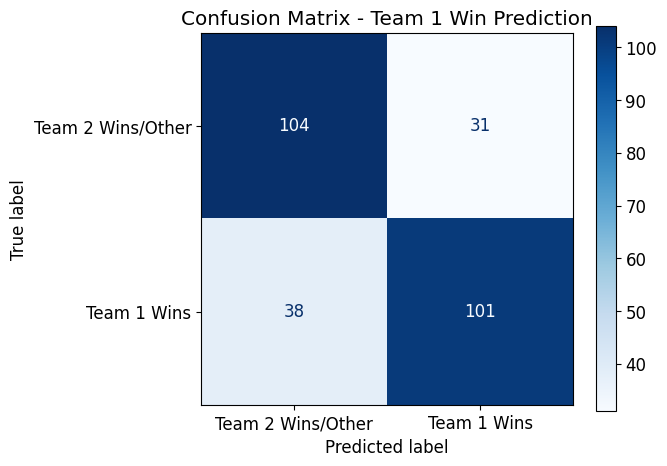

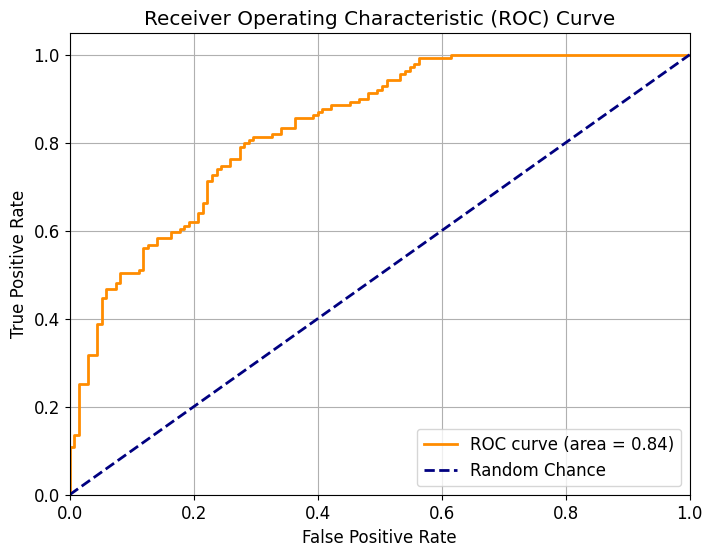


--- Feature Importance ---

Top 20 Features:
                                   feature  importance
0                              win_by_runs    0.239572
1                           win_by_wickets    0.207766
5                            is_team1_home    0.022905
11                             season_2013    0.019680
7                              season_2009    0.018656
15                             season_2017    0.015274
50                    team2_Mumbai Indians    0.014402
10                             season_2012    0.012362
77                     toss_decision_field    0.012178
59             toss_winner_Deccan Chargers    0.011386
140  venue_MA Chidambaram Stadium, Chepauk    0.011357
21                             season_2023    0.011340
20                             season_2022    0.010603
136            venue_M Chinnaswamy Stadium    0.010589
4                               is_weekend    0.010167
171                    season_phase_Middle    0.010003
6                  

C:\Users\shama\AppData\Local\Temp\ipykernel_12772\208660199.py:111: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




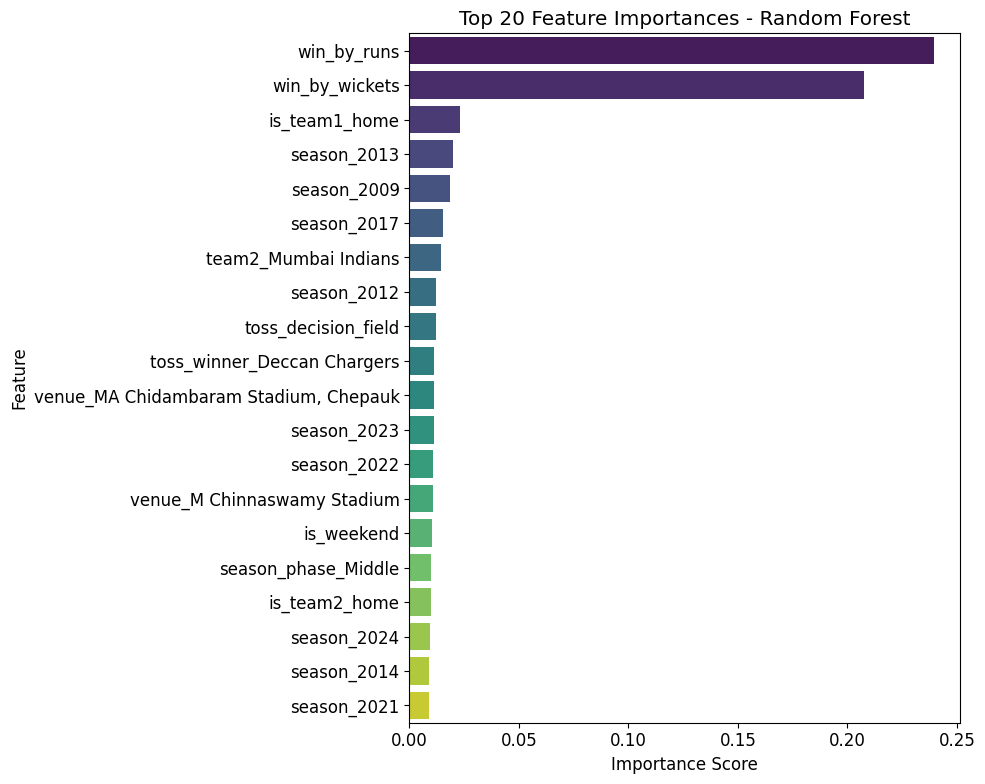

In [ ]:
print("\n8.1 Classification Models (Training & Evaluating Random Forest for Team 1 Win)")

# Import necessary evaluation metrics
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, ConfusionMatrixDisplay)

# Check if training/testing data is available from above step
if 'X_train' in locals() and X_train is not None and \
   'y_train' in locals() and y_train is not None and \
   'X_test' in locals() and X_test is not None and \
   'y_test' in locals() and y_test is not None:

    print(f"Using training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

    # --- Define the Model Pipeline ---
    # Pipeline helps ensure steps are applied consistently
    pipeline_rf = Pipeline([
        # Include scaling here if it wasn't applied universally to X before splitting
        # ('scaler', StandardScaler()), # Uncomment if X_train/X_test are not scaled yet
        ('classifier', RandomForestClassifier(
            random_state=42,
            n_estimators=150,          # Increased estimators slightly
            class_weight='balanced',   # Good for potentially imbalanced win rates
            max_depth=15,              # Limit tree depth to prevent overfitting
            min_samples_split=10,      # Minimum samples to split a node
            min_samples_leaf=5,        # Minimum samples at a leaf node
            n_jobs=-1                  # Use all available CPU cores
            ))
    ])

    # --- Train the Model ---
    print("\nTraining the Random Forest model...")
    try:
        pipeline_rf.fit(X_train, y_train)
        print("Model training completed.")

        # --- Make Predictions ---
        print("\nMaking predictions on the test set...")
        y_pred = pipeline_rf.predict(X_test)
        y_pred_proba = pipeline_rf.predict_proba(X_test)[:, 1] # Probability of Team 1 winning (class 1)
        print("Predictions generated.")

        # --- Evaluate the Model ---
        print("\n--- Model Evaluation ---")

        # 1. Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")

        # 2. AUC-ROC Score
        try:
            auc_score = roc_auc_score(y_test, y_pred_proba)
            print(f"AUC-ROC Score: {auc_score:.4f}")
        except ValueError as e:
            print(f"Could not calculate AUC-ROC: {e}") # Handle cases with only one class in y_test

        # 3. Classification Report (Precision, Recall, F1-Score)
        print("\nClassification Report:")
        # Use target_names for better readability if desired
        print(classification_report(y_test, y_pred, target_names=['Team 2 Wins/Other', 'Team 1 Wins']))

        # 4. Confusion Matrix
        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        # Plotting the Confusion Matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Team 2 Wins/Other', 'Team 1 Wins'])
        fig, ax = plt.subplots(figsize=(6, 5)) # Create figure and axes explicitly
        disp.plot(cmap='Blues', ax=ax) # Pass axes to display
        plt.title('Confusion Matrix - Team 1 Win Prediction')
        plt.show()


        # 5. ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

        # --- Feature Importance (for Random Forest) ---
        print("\n--- Feature Importance ---")
        # Access the classifier step in the pipeline
        if isinstance(pipeline_rf.named_steps['classifier'], RandomForestClassifier):
            classifier = pipeline_rf.named_steps['classifier']
            importances = classifier.feature_importances_
            feature_names = X_train.columns # Get feature names from training data

            # Create a DataFrame for better visualization
            feature_importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            }).sort_values('importance', ascending=False)

            # Display top N features
            n_top_features = 20
            print(f"\nTop {n_top_features} Features:")
            print(feature_importance_df.head(n_top_features))

            # Plot top N features
            plt.figure(figsize=(10, 8))
            sns.barplot(x='importance', y='feature', data=feature_importance_df.head(n_top_features), palette='viridis')
            plt.title(f'Top {n_top_features} Feature Importances - Random Forest')
            plt.xlabel('Importance Score')
            plt.ylabel('Feature')
            plt.tight_layout()
            plt.show()
        else:
            print("Could not extract feature importances (model is not a RandomForestClassifier or pipeline structure differs).")

    except Exception as e:
        print(f"\nAn error occurred during model training or evaluation: {e}")
        import traceback
        traceback.print_exc() # Print detailed traceback

else:
    print("\nSkipping Classification Model Training & Evaluation because training/testing data (X_train, y_train, X_test, y_test) is not available or not properly defined.")


8.2 Regression Models (Training & Evaluating GBR for Run Margin)

Preparing data for run margin prediction...
Found 498 matches won by runs.
Shape of feature set for regression (X_reg): (498, 172)
Shape of target set for regression (y_reg): (498,)

Regression data split:
Training set shape: X=(373, 172), y=(373,)
Test set shape: X=(125, 172), y=(125,)

Training the Gradient Boosting Regressor model...
Model training completed.

Making predictions on the test set...
Predictions generated.

--- Regression Model Evaluation ---
Mean Absolute Error (MAE): 20.08 runs
Root Mean Squared Error (RMSE): 27.31 runs
R-squared (R²): -0.0866
Model training completed.

Making predictions on the test set...
Predictions generated.

--- Regression Model Evaluation ---
Mean Absolute Error (MAE): 20.08 runs
Root Mean Squared Error (RMSE): 27.31 runs
R-squared (R²): -0.0866


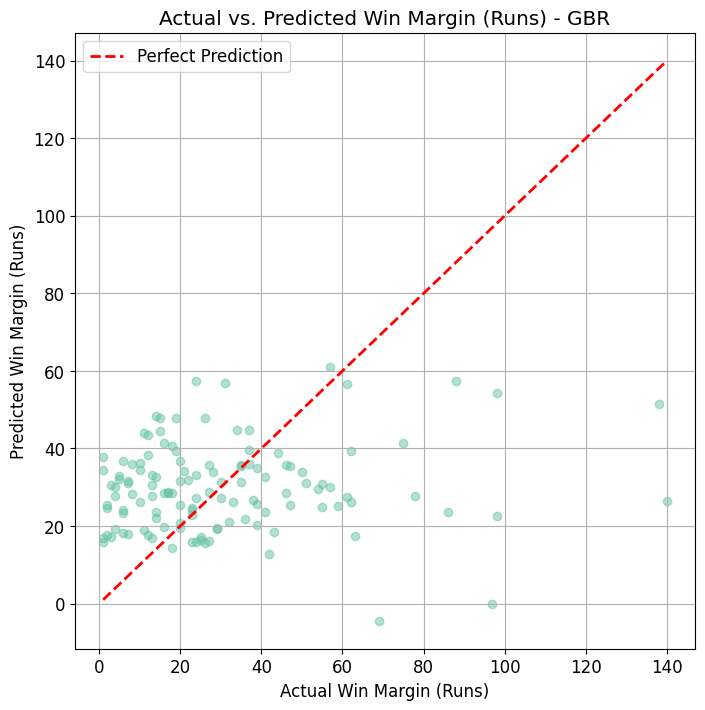


--- Feature Importance (GBR) ---

Top 20 Features:
                                               feature  importance
171                                 season_phase_Start    0.092831
2                                           is_weekend    0.066321
4                                        is_team1_home    0.048901
112                                 city_Visakhapatnam    0.040358
41                                team2_Delhi Capitals    0.036924
76                                 toss_decision_field    0.034443
60                        toss_winner_Delhi Daredevils    0.031777
170                                season_phase_Middle    0.030246
45                               team2_Kings XI Punjab    0.025190
3                                toss_winner_won_match    0.023352
87                                     city_Dharamsala    0.022284
94                                         city_Jaipur    0.021672
78                                      city_Bangalore    0.021221
29        

C:\Users\shama\AppData\Local\Temp\ipykernel_12772\2223710723.py:120: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




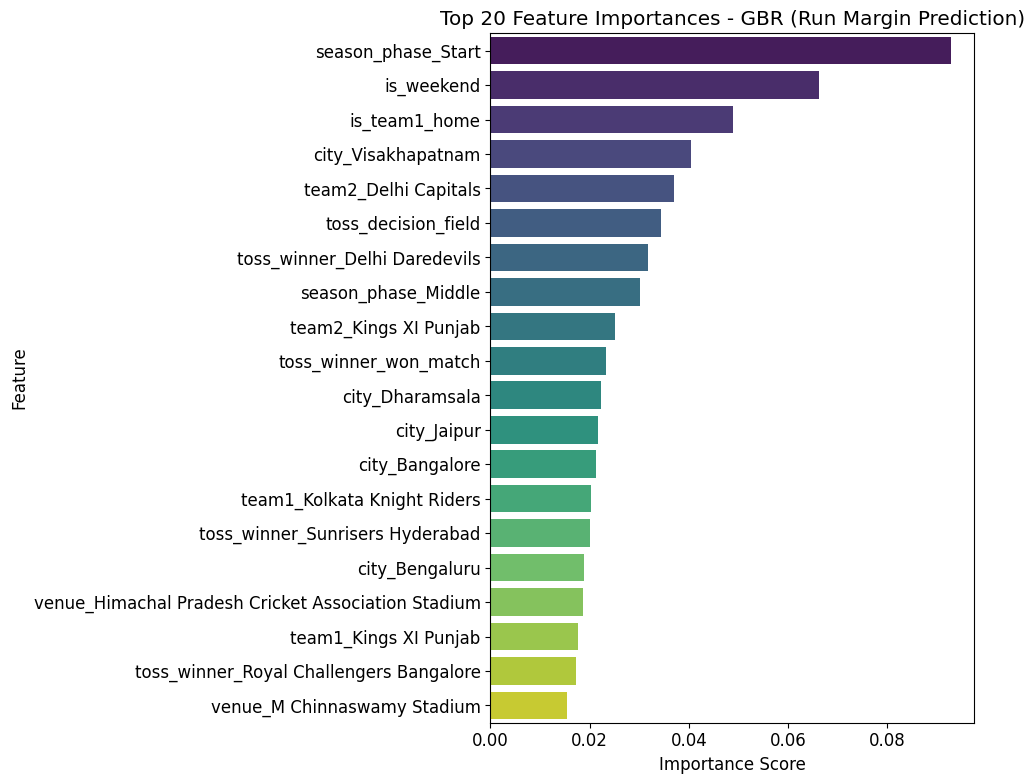

In [61]:
# --- 8.2 Regression Models ---
print("\n8.2 Regression Models (Training & Evaluating GBR for Run Margin)")

# Import necessary evaluation metrics for regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler # Ensure scaler is imported if needed in pipeline

# --- Data Preparation for Regression ---
print("\nPreparing data for run margin prediction...")

# Define the target population: Matches won by runs
# Ensure 'df' and 'model_df_encoded' are available
if 'df' in locals() and 'model_df_encoded' in locals():
    reg_target_df = df[df['win_by_runs'] > 0].copy()

    if not reg_target_df.empty:
        print(f"Found {len(reg_target_df)} matches won by runs.")
        # Align features from model_df_encoded with this subset using index
        # Ensure model_df_encoded has been created in step 6.1
        if reg_target_df.index.isin(model_df_encoded.index).all():
            X_reg_all = model_df_encoded.loc[reg_target_df.index].copy()

            # Define target variable
            y_reg = reg_target_df['win_by_runs']

            # Define features: Drop target and other potential leakage columns
            features_to_drop = ['win_by_runs', 'win_by_wickets'] # Always drop target and other margin
            # Optionally drop others if they leak info strongly for this specific task
            # features_to_drop.append('toss_winner_won_match')

            cols_exist_to_drop = [col for col in features_to_drop if col in X_reg_all.columns]
            X_reg = X_reg_all.drop(columns=cols_exist_to_drop)
            print(f"Shape of feature set for regression (X_reg): {X_reg.shape}")
            print(f"Shape of target set for regression (y_reg): {y_reg.shape}")

            # Check alignment one last time
            if len(X_reg) == len(y_reg):
                # --- Train-Test Split for Regression Data ---
                X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
                    X_reg, y_reg, test_size=0.25, random_state=42
                )
                print(f"\nRegression data split:")
                print(f"Training set shape: X={X_reg_train.shape}, y={y_reg_train.shape}")
                print(f"Test set shape: X={X_reg_test.shape}, y={y_reg_test.shape}")

                # --- Define the Model Pipeline (with Scaling) ---
                pipeline_gbr = Pipeline([
                    ('scaler', StandardScaler()), # Scaling is generally important for GBR
                    ('regressor', GradientBoostingRegressor(
                        random_state=42,
                        n_estimators=100,         # Number of boosting stages
                        learning_rate=0.1,        # Step size shrinkage
                        max_depth=5,              # Limit tree depth
                        min_samples_split=10,     # Min samples to split
                        min_samples_leaf=5,       # Min samples per leaf
                        loss='squared_error'      # Default loss function for regression
                    ))
                ])

                # --- Train the Model ---
                print("\nTraining the Gradient Boosting Regressor model...")
                try:
                    pipeline_gbr.fit(X_reg_train, y_reg_train)
                    print("Model training completed.")

                    # --- Make Predictions ---
                    print("\nMaking predictions on the test set...")
                    y_reg_pred = pipeline_gbr.predict(X_reg_test)
                    print("Predictions generated.")

                    # --- Evaluate the Model ---
                    print("\n--- Regression Model Evaluation ---")

                    # 1. Mean Absolute Error (MAE)
                    mae = mean_absolute_error(y_reg_test, y_reg_pred)
                    print(f"Mean Absolute Error (MAE): {mae:.2f} runs")

                    # 2. Root Mean Squared Error (RMSE)
                    # Use np.sqrt of mean_squared_error for compatibility across sklearn versions
                    rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
                    print(f"Root Mean Squared Error (RMSE): {rmse:.2f} runs")

                    # 3. R-squared (R²) Score
                    r2 = r2_score(y_reg_test, y_reg_pred)
                    print(f"R-squared (R²): {r2:.4f}")

                    # 4. Scatter Plot: Actual vs Predicted
                    plt.figure(figsize=(8, 8))
                    plt.scatter(y_reg_test, y_reg_pred, alpha=0.5)
                    plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], '--r', lw=2, label='Perfect Prediction')
                    plt.xlabel("Actual Win Margin (Runs)")
                    plt.ylabel("Predicted Win Margin (Runs)")
                    plt.title("Actual vs. Predicted Win Margin (Runs) - GBR")
                    plt.legend()
                    plt.grid(True)
                    plt.show()

                    # --- Feature Importance (for Gradient Boosting) ---
                    print("\n--- Feature Importance (GBR) ---")
                    # Access the regressor step in the pipeline
                    if isinstance(pipeline_gbr.named_steps['regressor'], GradientBoostingRegressor):
                        regressor = pipeline_gbr.named_steps['regressor']
                        importances = regressor.feature_importances_
                        feature_names = X_reg_train.columns # Get feature names from training data

                        # Create a DataFrame
                        feature_importance_df_reg = pd.DataFrame({
                            'feature': feature_names,
                            'importance': importances
                        }).sort_values('importance', ascending=False)

                        # Display top N features
                        n_top_features = 20
                        print(f"\nTop {n_top_features} Features:")
                        print(feature_importance_df_reg.head(n_top_features))

                        # Plot top N features
                        plt.figure(figsize=(10, 8))
                        sns.barplot(x='importance', y='feature', data=feature_importance_df_reg.head(n_top_features), palette='viridis')
                        plt.title(f'Top {n_top_features} Feature Importances - GBR (Run Margin Prediction)')
                        plt.xlabel('Importance Score')
                        plt.ylabel('Feature')
                        plt.tight_layout()
                        plt.show()
                    else:
                        print("Could not extract feature importances (model is not GradientBoostingRegressor or pipeline structure differs).")

                except Exception as e:
                    print(f"\nAn error occurred during regression model training or evaluation: {e}")
                    import traceback
                    traceback.print_exc() # Print detailed traceback

            else:
                print("\nSkipping Regression: Feature and target data lengths do not match after alignment.")
        else:
            print("\nSkipping Regression: Index mismatch between target data and encoded features.")
    else:
        print("\nSkipping Regression: No matches found meeting the criteria (win_by_runs > 0).")
else:
    print("\nSkipping Regression Model Training & Evaluation because base dataframes ('df' or 'model_df_encoded') are not available.")


---------- 9. VISUALIZATIONS FOR Dashboard ----------
Generating selected presentation-ready visualizations...


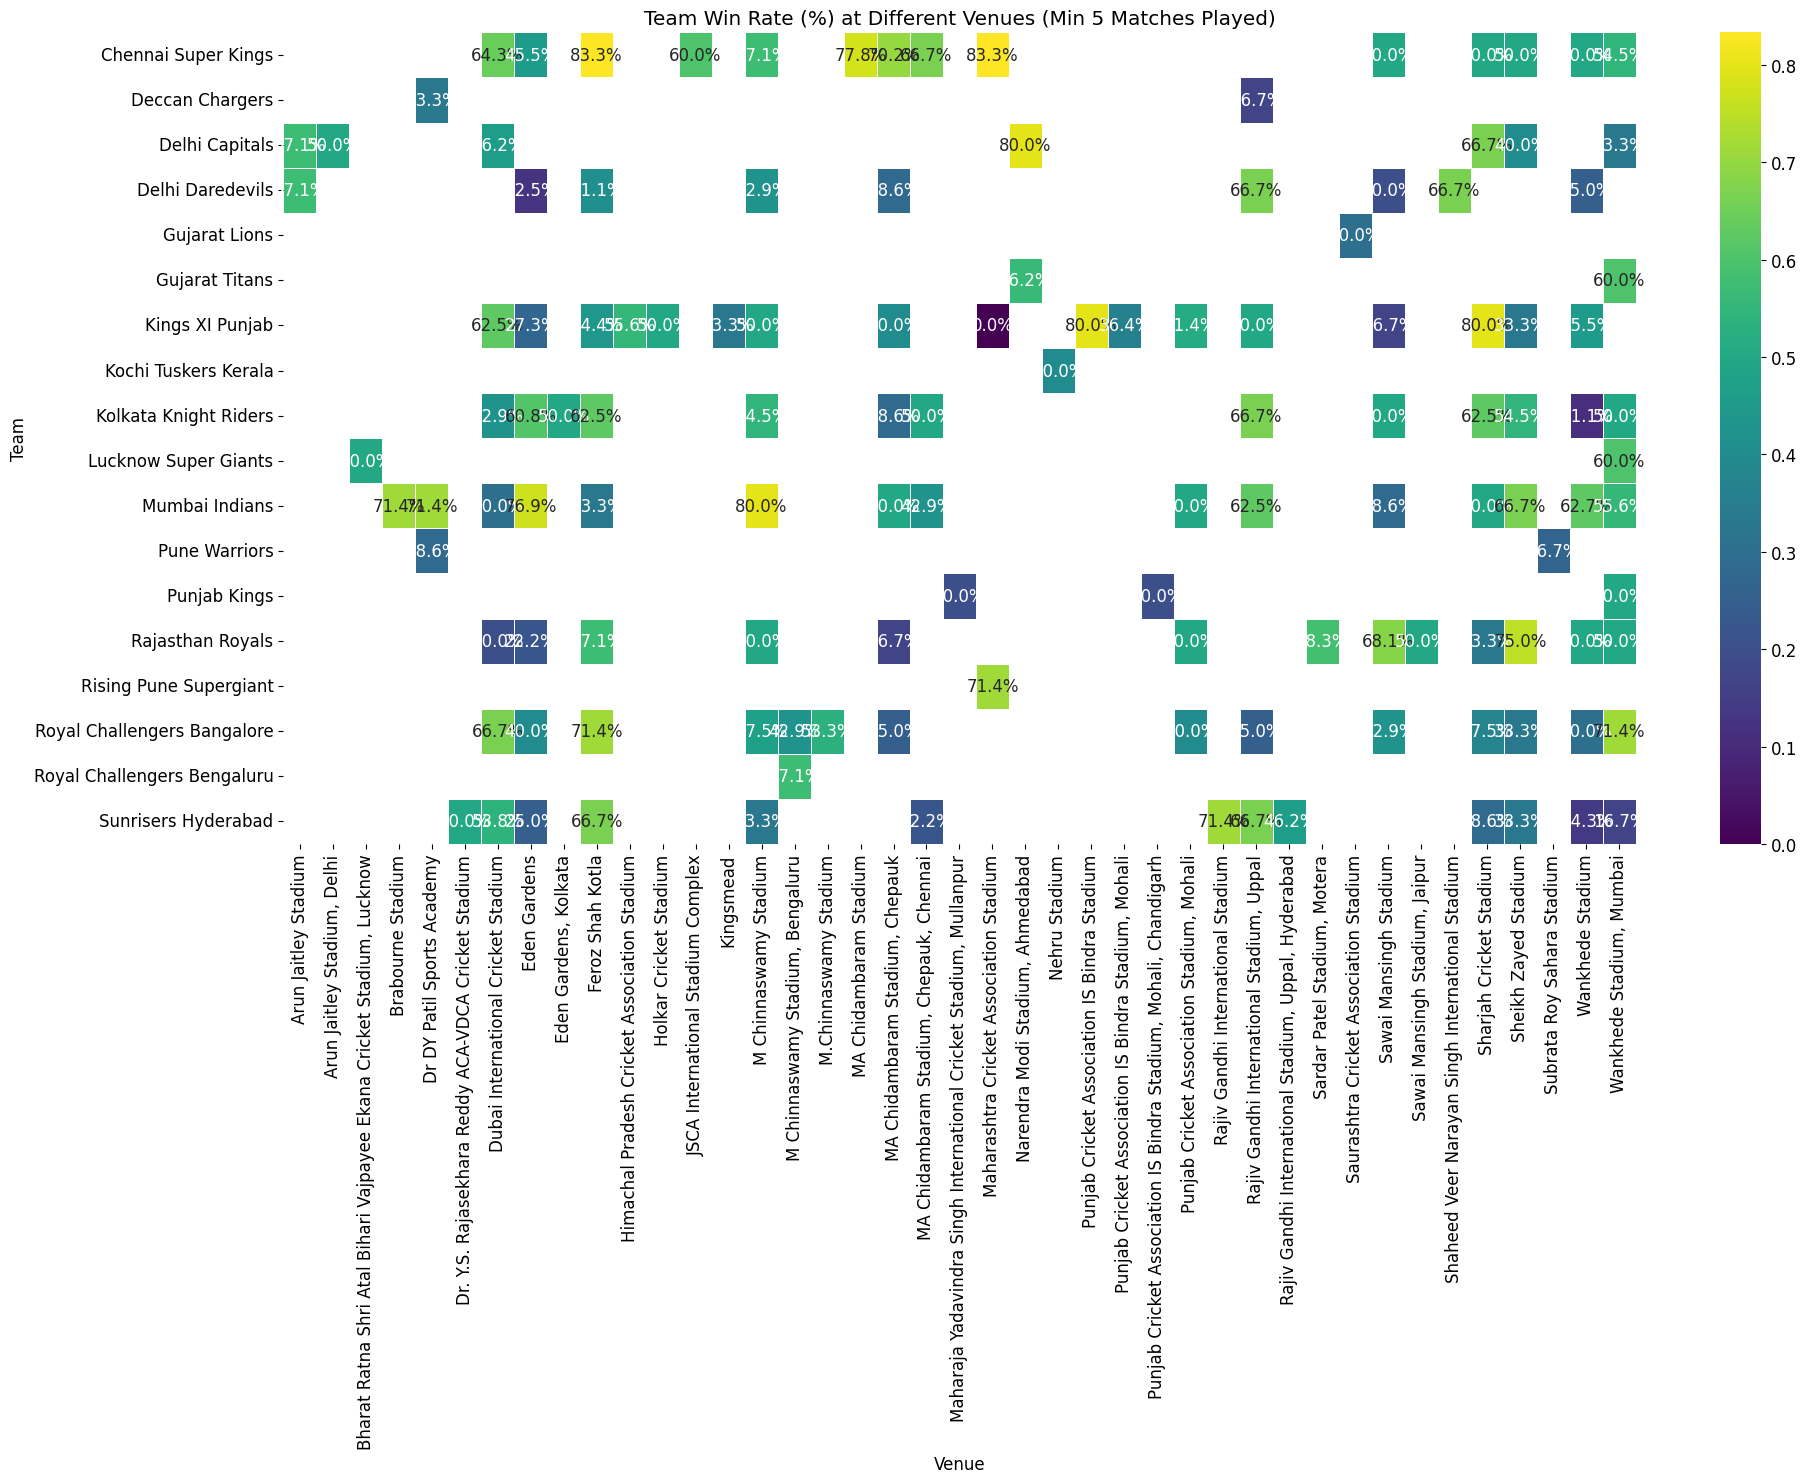

In [64]:
print("\n---------- 9. VISUALIZATIONS FOR Dashboard ----------")
print("Generating selected presentation-ready visualizations...")

# 9.1 Interactive Batsman Comparison (Example: Runs vs Strike Rate)
batsman_stats = pd.DataFrame({
    'runs': batsman_runs,
    'balls': balls_faced,
    'strike_rate': batsman_strike_rate,
    'average': batsman_average,
    'dismissals': dismissals
}).dropna(subset=['strike_rate', 'average']) # Drop if SR or Avg couldn't be calculated

# Filter for plotting (e.g., min 500 runs)
batsman_stats_filtered = batsman_stats[batsman_stats['runs'] >= 1000].reset_index()

fig_scatter = px.scatter(batsman_stats_filtered, x='strike_rate', y='average',
                         size='runs', color='runs', hover_name='batter',
                         title='Batsman Performance Comparison (Average vs Strike Rate, Size=Runs, Min 1000 Runs)',
                         labels={'strike_rate': 'Strike Rate', 'average': 'Average Runs per Dismissal', 'runs': 'Total Runs'},
                         color_continuous_scale=px.colors.sequential.Viridis)
fig_scatter.update_layout(xaxis_title="Strike Rate", yaxis_title="Average")
fig_scatter.show()

# Example Placeholder: Heatmap of Team vs Venue Win Rates
venue_pivot = venue_performance[venue_performance['matches'] >= 5].pivot(index='team', columns='venue', values='win_rate')
plt.figure(figsize=(20, 15))
sns.heatmap(venue_pivot, annot=True, fmt=".1%", cmap="viridis", linewidths=.5)
plt.title('Team Win Rate (%) at Different Venues (Min 5 Matches Played)')
plt.xlabel('Venue')
plt.ylabel('Team')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()